<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [3]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [7]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [11]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [14]:
print(digits.shape)
print(digits.info())
print(digits.describe())

(1797, 65)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non-null   int64
 23  c2

**Análisis exploratorio:**
Hay 1797 imagenes que representan un digito y 64 columnas, las primeras 63 indican la representaci'on de la imagen en escala blanco-grises y la ultima representa el digito que se intenta escribir. Los digitos que representan los pixeles estan en formato int asi como el digito target. No hay valores Null ni NaN lo cual nos da una correcta lectura de los datos.

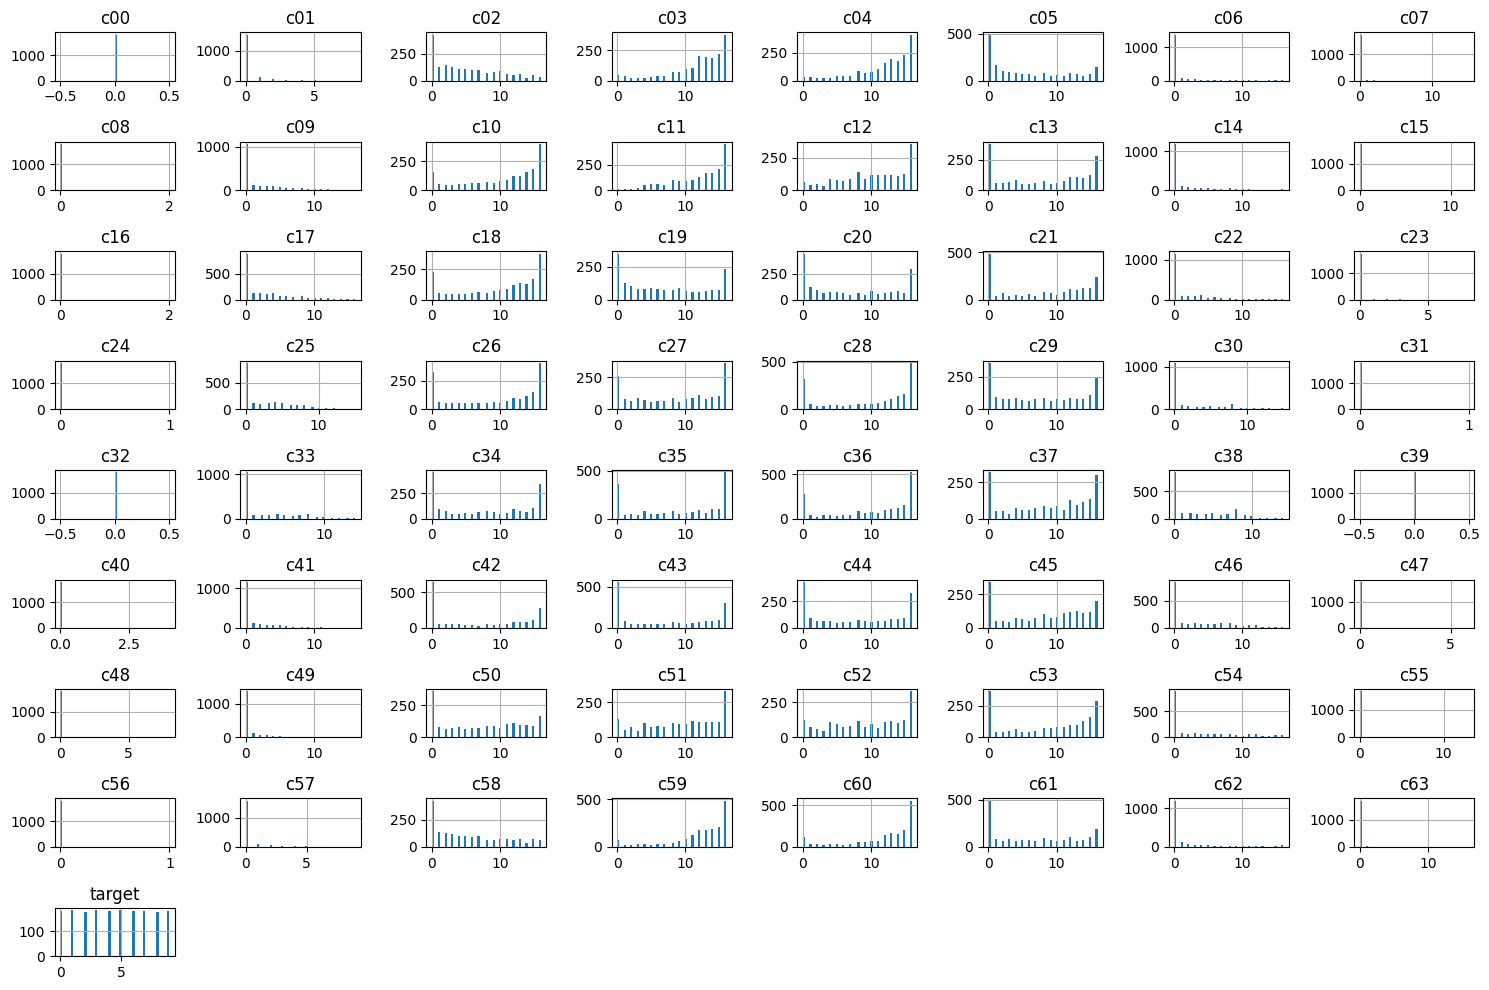

In [15]:
digits.hist(figsize = (15,10),bins =50)
plt.tight_layout()
plt.show()

Además, es posible notar la precencia de outliers, con lo que la media no sea representativa y los modelos de predicción pudieran ser afectados.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [16]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

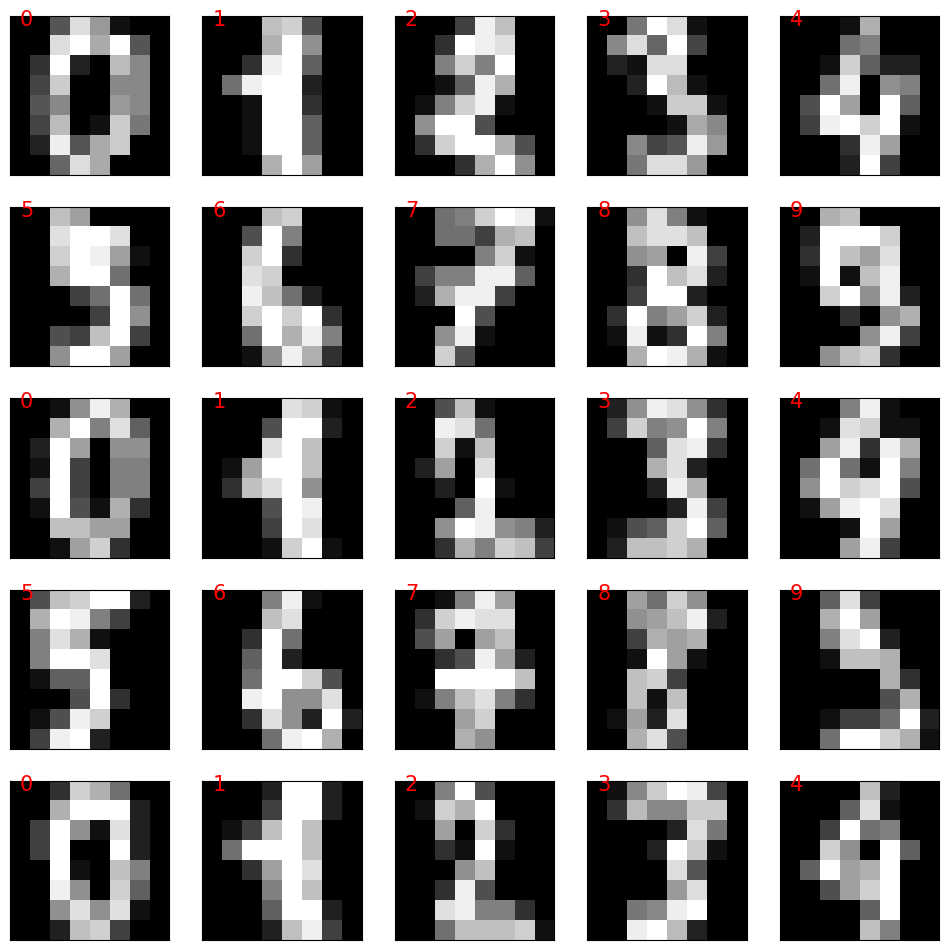

In [20]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
imagen = digits_dict['images'][:25]
nombre = digits_dict['target'][:25]
for i in range(nx):
    for j in range(ny):
            axs[i, j].imshow(imagen[i*ny+j], cmap='gray')
            axs[i, j].text(0, 0, nombre[i*ny+j], color='red', fontsize=15)
            axs[i, j].get_xaxis().set_visible(False)
            axs[i, j].get_yaxis().set_visible(False)
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [22]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

El tercer modelo a escoger es *SVM* o *Support vector machine* para comparar directamente con *K-Nearest Neighbors*

In [23]:
#cargando modelos
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

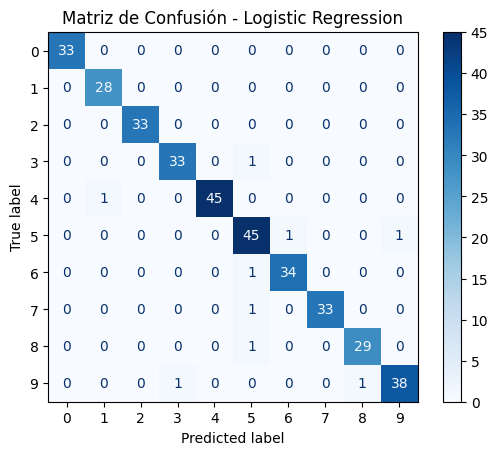

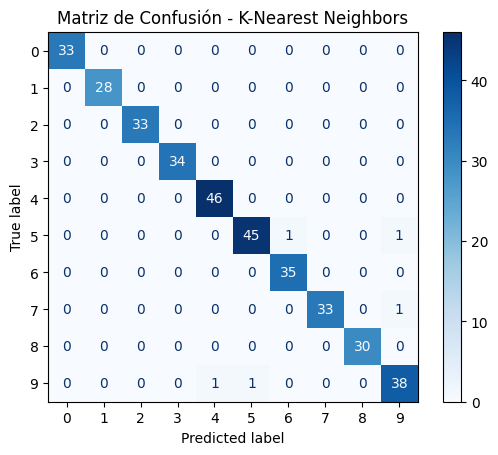

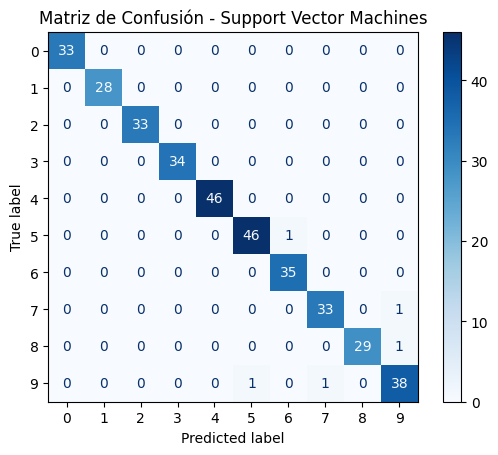

                    Modelo  Accuracy  Precision    Recall  F1-Score  \
0      Logistic Regression  0.975000   0.975478  0.975000  0.975109   
1      K-Nearest Neighbors  0.986111   0.986187  0.986111  0.986080   
2  Support Vector Machines  0.986111   0.986188  0.986111  0.986107   

   Tiempo de Ejecución  
0             0.386413  
1             0.064989  
2             0.109041  


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=42)
models ={
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machines": SVC()
}
# Entrenar y evaluar los modelos
results = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()

    # Calcular las métricas de error
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Guardar los resultados
    results.append([name, accuracy, precision, recall, f1, end_time - start_time])

    # Graficar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits_dict['target_names'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()
# Mostrar los resultados en una tabla
results_df = pd.DataFrame(results, columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Tiempo de Ejecución'])
print(results_df)

* ¿Cuál modelo es mejor basado en sus métricas?\
Por las metricas el mejor modelo por un margen muy pequeño es *SVD*

* ¿Cuál modelo demora menos tiempo en ajustarse?\
El modelo que menor tiempo posee es el *K-Nearest Neighbors*

* ¿Qué modelo escoges?\
Se escoge el modelo *SVD*, puesto que, a pesar que posee un tiempo mayor, posee una mejor presición.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

C:\Users\William\AppData\Local\Temp\ipykernel_20124\3465352524.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color=plt.cm.get_cmap('tab10')(i),
C:\Users\William\AppData\Local\Temp\ipykernel_20124\3465352524.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color=plt.cm.get_cmap('tab10')(i),
C:\Users\William\AppData\Local\Temp\ipykernel_20124\3465352524.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color=plt.cm.get_cmap('tab10')(i),
C:\Users\Will

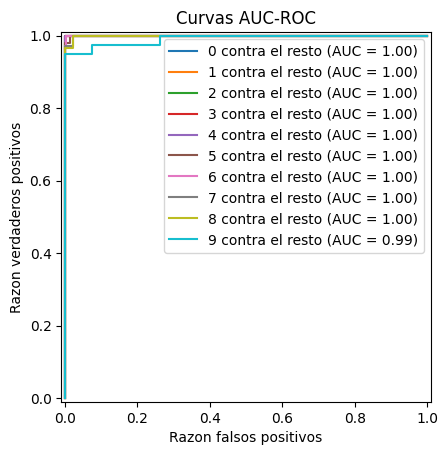

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
svc_model=SVC()
svc_model.fit(X_train, y_train)
for i in range(10):
    class_of_interest = i
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    class_id
    y_score = svc_model.decision_function(X_test)
    from sklearn.metrics import RocCurveDisplay

    display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} contra el resto",
        color=plt.cm.get_cmap('tab10')(i),
        plot_chance_level=False,
        ax=plt.gca()
    )
plt.xlabel("Razon falsos positivos")
plt.ylabel("Razon verdaderos positivos")
plt.title("Curvas AUC-ROC")
plt.legend(loc="best")
plt.show()

Del gráfico, queda claro que el modelo ha predicho con éxito los digitos dado los píxeles, pues todos tienen una razón de falsos positivos casi nula.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [26]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Valores incorrectos: SVC


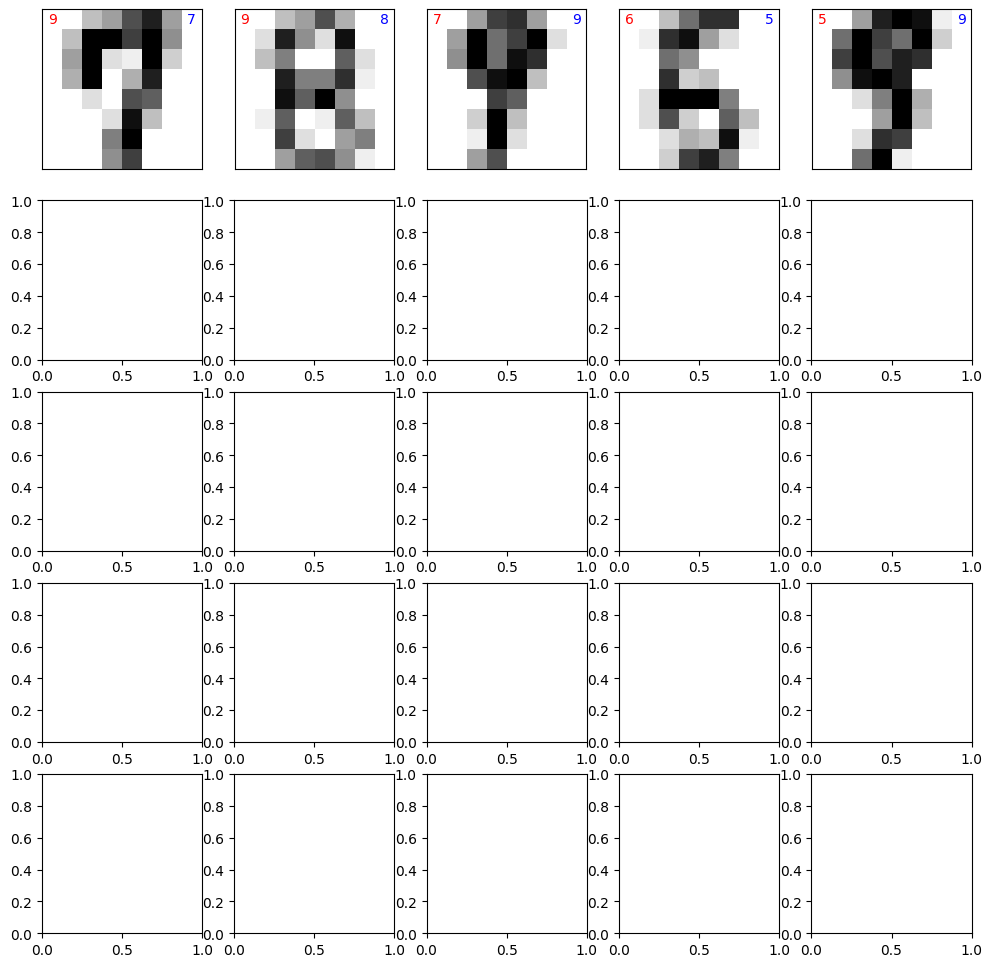

Valores incorrectos: K-Nearest Neighbors


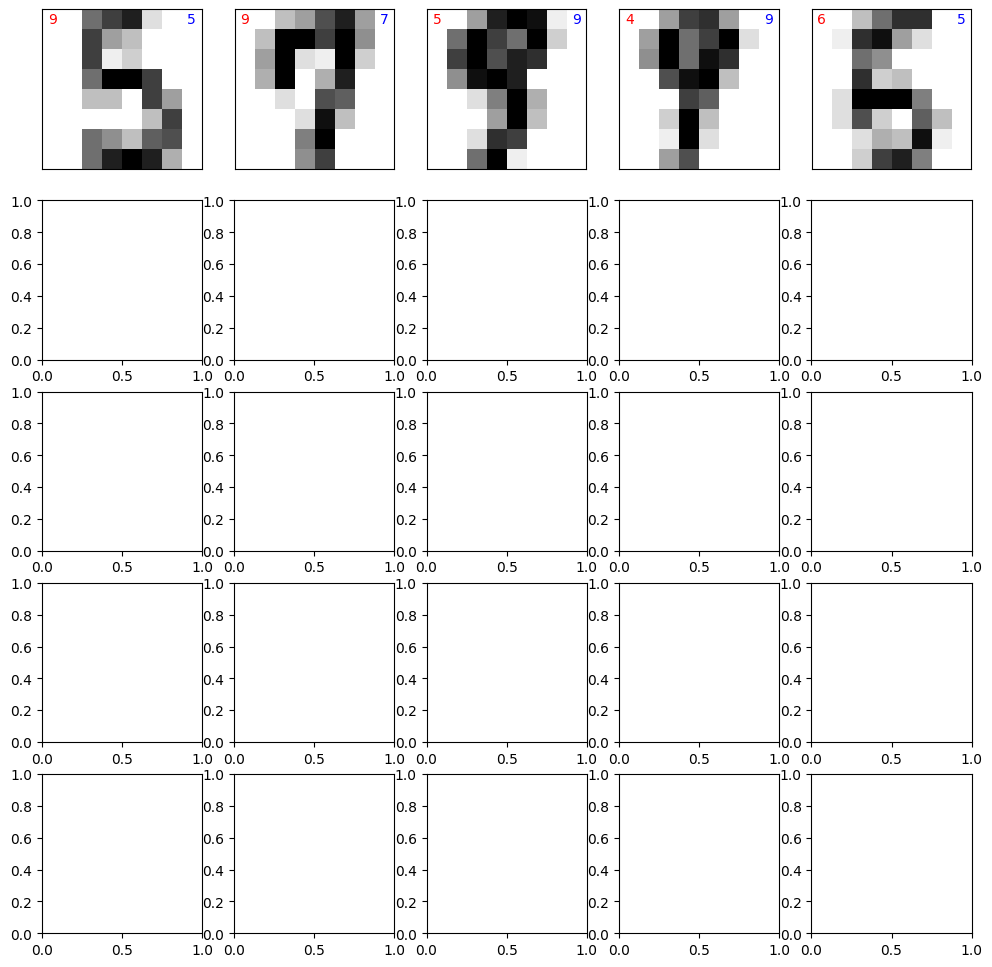

Valores incorrectos: Logistic Regression


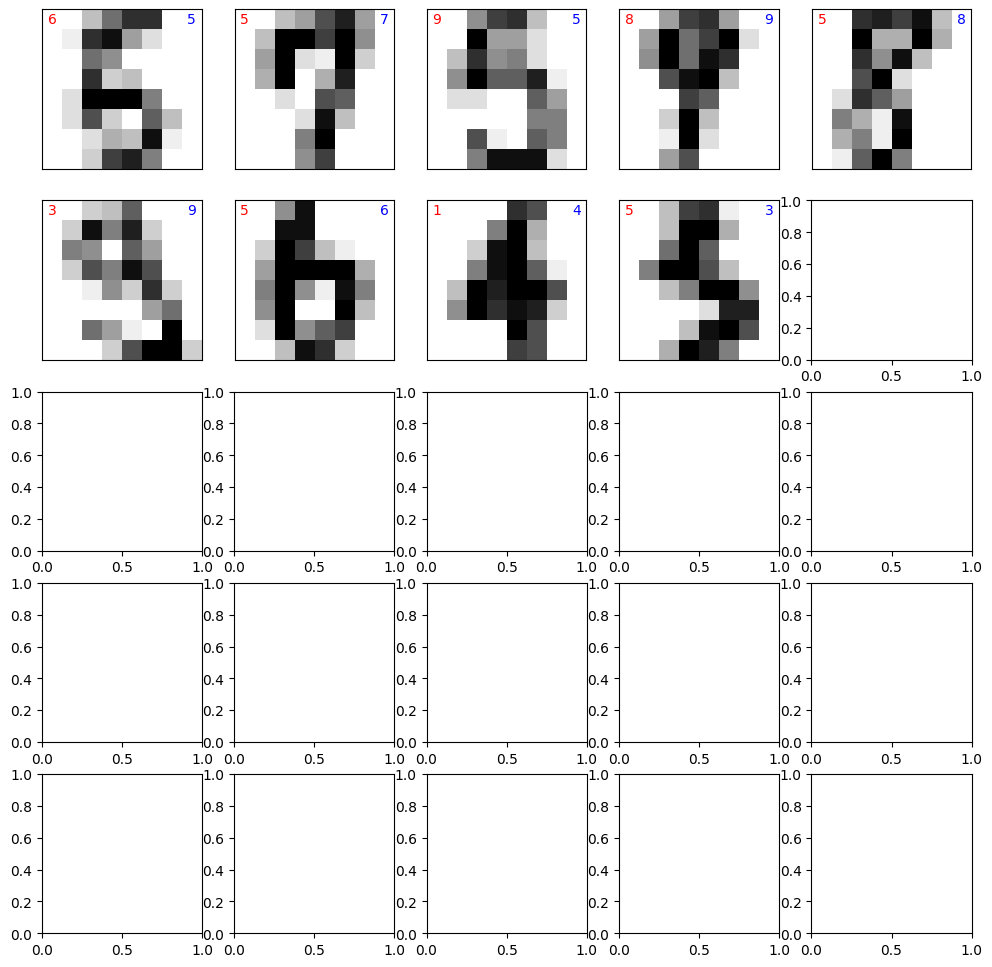

In [27]:

print("Valores incorrectos: SVC")
mostrar_resultados(digits, SVC(), nx, ny, 'incorrectos')
print('Valores incorrectos: K-Nearest Neighbors')
mostrar_resultados(digits, KNeighborsClassifier(), nx, ny, 'incorrectos')
print('Valores incorrectos: Logistic Regression')
mostrar_resultados(digits, LogisticRegression(max_iter=1000), nx, ny, 'incorrectos')

Los errores aparecen cuando el cúmulo de píxeles se vuelve ambiguo al reconocer el número, esto se puede deber a que hemos quitado la resolución de las imagenes.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Sin duda alguna la dificultad radica en escoger bien el modelo o idear uno nuevo. Pues, esto se puede dificultar rapidamente si en vez de analizar un numero se tiene que analizar una secuencia larga de ellos. Pese a todo esto, el modelo escogido ha funcionado bien y de 25 imagenes solo fallo en 5